<a href="https://colab.research.google.com/github/Saify-Technologies/simple-linear-regression-jax-pytorch-tensorflow/blob/main/sgd_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
n = 100 # total number of points
x = np.ones(shape=(n,2));x[:5]
# x = tf.ones((n,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
x[:5]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
x_ = np.linspace(-1, 1, num=100); x_.shape

(100,)

In [ ]:
x[:,0] = x_

In [ ]:
x.shape

(100, 2)

In [ ]:
a  = np.array([3,2]);a.shape

(2,)

In [ ]:
y = x@a + 0.75*np.random.rand(n);y.shape

(100,)

In [ ]:
y[:5]

array([-0.88646101, -0.78377149, -0.33186564, -0.56756947, -0.11890533])

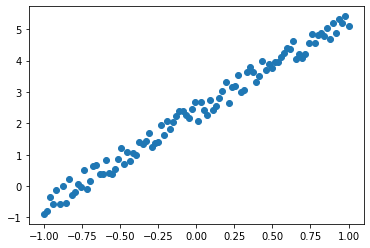

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y);

In [ ]:
a = np.array([-.5,.5])
ypred = x@a
x.shape,a.shape,x[0,0]

((100, 2), (2,), -1.0)

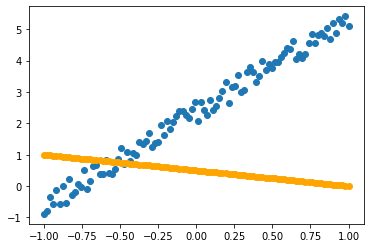

In [ ]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0], ypred,c="orange");

In [ ]:
ypred,x[:,1]

(array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
        0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
        0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
        0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
        0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
        0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
        0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
        0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
        0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
        0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
        0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
        0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
        0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
        0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
        0.29292929, 0.28282828, 0.27272727, 0.26

In [ ]:
def mse(ypred,y):
  return tf.reduce_mean((ypred-y)**2)

a.shape

(2,)

In [ ]:
subs  = np.mean((ypred - y)**2);
subs

7.705742781922769

In [ ]:
pre = mse(ypred,y);pre.numpy()

7.705742781922768

In [ ]:
a = tf.Variable(tf.reshape(np.array([-.5,.5]),shape=(2,1)));a

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-0.5],
       [ 0.5]])>

In [ ]:
x_new = tf.constant(x)


x_new.shape,a.shape

(TensorShape([100, 2]), TensorShape([2, 1]))

In [ ]:
ypred_tensor = x_new@a
y_tensor = tf.constant(y)
ypred_tensor.shape , y_tensor.shape

(TensorShape([100, 1]), TensorShape([100]))

In [ ]:
loss_ch = mse(tf.reshape(ypred_tensor,shape=(100,)) , y) ; loss_ch

<tf.Tensor: shape=(), dtype=float64, numpy=7.705742781922768>

In [ ]:
def update():
  with tf.GradientTape() as tape:
    ypred = x_new@a    
    loss = mse(tf.reshape(ypred,shape=(100,)),y)
    if t%10 == 0 : print(loss)
    tape.watch(a)
  grad = tape.gradient(loss, a)
  a.assign_sub((lr * grad))

In [ ]:
lr = 1e-1
for t in range(100):
  update()

tf.Tensor(7.705742781922768, shape=(), dtype=float64)
tf.Tensor(1.1060627424760385, shape=(), dtype=float64)
tf.Tensor(0.2976122078349912, shape=(), dtype=float64)
tf.Tensor(0.10926455454946592, shape=(), dtype=float64)
tf.Tensor(0.0633296688414351, shape=(), dtype=float64)
tf.Tensor(0.05210204996842453, shape=(), dtype=float64)
tf.Tensor(0.049357455769699445, shape=(), dtype=float64)
tf.Tensor(0.048686535729611694, shape=(), dtype=float64)
tf.Tensor(0.04852252831270078, shape=(), dtype=float64)
tf.Tensor(0.04848243645153999, shape=(), dtype=float64)


In [ ]:
a

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.99513776],
       [2.36969323]])>

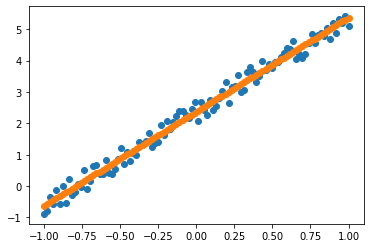

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],tf.reshape(x_new@a,shape=(100,)));

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = tf.Variable(tf.reshape(np.array([-100.,.1]),shape=(2,1)))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], tf.reshape(x_new@a,shape=(100,)))
plt.close()

def animate(i):
    update()
    line.set_ydata(tf.reshape(x_new@a,shape=(100,)))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)


In [ ]:
import tensorflow as tf

# Here goes the neural network weights as tf.Variable
x1 = tf.Variable(3.0)

# TensorFlow operations executed within the context of
# a GradientTape are  recorded for differentiation 
with tf.GradientTape() as tape:
  # Doing the computation in the context of the gradient tape
  # For example computing loss
  y1 = x1 ** 2 

# Getting the gradient of network weights w.r.t. loss
dy_dx = tape.gradient(y1, x1) 
print(dy_dx)  # Returns 6

tf.Tensor(6.0, shape=(), dtype=float32)
